In [1]:
import scipy.io as io
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
font = {'family': 'serif', 'serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('text', usetex=False)

In [3]:
label_fontsize = 16 
title_fontsize = 18

In [4]:
# sns.set(font_scale=1.25)
# sns.set_style("ticks")

sns.set(font_scale=1.25, style="whitegrid")

In [5]:
basefilename = "02_27072018_SponSleep_Calib" #"",                           "02_27072018_SponSleep_Calib","03_14092018_SponSleep_Calib",,
                                             #"04_17092018_SponSleep_Calib","05_19092018_SponSleep_Calib","06_30102018_SponSleep_Calib",
                                             #"07_01112018_SponSleep_Calib","08_03112018_SponSleep_Calib","09_13112018_SponSleep_Calib",
                                             #"10_21112018_SponSleep_Calib","11_22112018_SponSleep_Calib","12_28112018_SponSleep_Calib",
                                             #"13_29112018_SponSleep_Calib","14_11122018_SponSleep_Calib","15_13122018_SponSleep_Calib",
                                             #"16_18122018_SponSleep_Calib","17_10012019_SponSleep_Calib","18_17012019_SponSleep_Calib",
                                             #"19_22012019_SponSleep_Calib","20_07022019_SponSleep_Calib","21_20022019_SponSleep_Calib",
                                             #"22_06032019_SponSleep_Calib","23_13032019_SponSleep_Calib"

In [6]:
basefolder = "/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/"

In [7]:
inputfolderpath = basefolder + "drosSleepStages_SciAdvances2023/data/calib_data/"

inputfilepath = inputfolderpath + basefilename[3:] + ".mat"

In [8]:
print("Input file: " + inputfilepath)

Input file: /rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/drosSleepStages_SciAdvances2023/data/calib_data/27072018_SponSleep_Calib.mat


In [9]:
#Load the calibration data from some samples..
mat_calib = io.loadmat(inputfilepath)

In [10]:
Stimdata_mean = mat_calib['meanStimtrack']
Stimdata_se = mat_calib['seStimtrack']
Lfpdata_mean = mat_calib['meanlfp_channel']
Lfpdata_se = mat_calib['selfp_channel']

In [11]:
y_lfp_mean = Lfpdata_mean
y_lfp_se = Lfpdata_se

y_stimdata_mean = Stimdata_mean
y_stimdata_se = Stimdata_se

print(y_stimdata_mean.shape)
print(y_lfp_mean.shape)

print((y_stimdata_mean+y_stimdata_se).T.shape)

(1, 926)
(16, 926)
(926, 1)


In [12]:
#Set the bolding range..
bold_lfp1a = slice(100, 150)
bold_lfp1b = slice(350, 400)
bold_lfp1c = slice(600, 650)

Text(0.5, 0, 'time (s)')

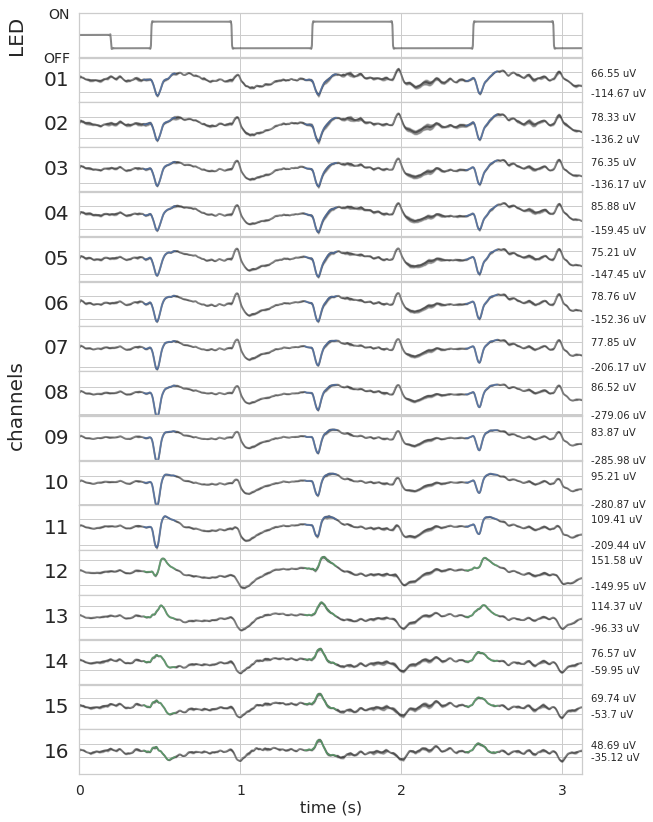

In [13]:
#plt.style.use('ggplot')

fig = plt.figure(figsize=(9, 14)) 


nchan = 17 # 7, number of channels to display..
ax = [0]*nchan
for i, j in zip(range(nchan), np.arange(0,(nchan)*(nchan),nchan)):
    ax[i] = plt.subplot2grid(((nchan)*(nchan), 1), (j, 0), rowspan=nchan, fig = fig)
    plt.setp(ax[i], xticks=[0, 250, 500, 750, y_lfp_mean.shape[1]], xticklabels=['0','1', '2', '3'])   
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)  
#plt.tight_layout()

#set up the time list now..
x = list(range(0, y_lfp_mean.shape[1]))

#values for the light stimulus ON, OFF
ax[0].plot(x, y_stimdata_mean.T, 'k-', alpha=0.5, linewidth=2.0)
lower_bound = np.squeeze(np.array((y_stimdata_mean+y_stimdata_se).T))
upper_bound = np.squeeze(np.array((y_stimdata_mean-y_stimdata_se).T))
x_plot = np.array(x)
ax[0].fill_between(x_plot, lower_bound, upper_bound, alpha=0.5, facecolor='k')

ax[0].axes.yaxis.set_ticklabels(['OFF',' ','ON'])
#y-axis related stuff
ax[0].set_ylim([-200, 200])
ax[0].axes.yaxis.set_ticks([-250, 0, 250])

#dispchanlist = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] 
colorlist =    ['b-','b-','b-','b-','b-','b-','b-','b-','b-', 'b-','b-','g-', 'g-','g-','g-', 'g-','g-','g-', 'g-','g-',]

for chanidx in range(nchan-1):
    ax[chanidx+1].plot(x,             y_lfp_mean[chanidx], 'k-', alpha=0.5, linewidth=2.0)
    ax[chanidx+1].plot(x[bold_lfp1a], y_lfp_mean[chanidx][bold_lfp1a], colorlist[chanidx], alpha=0.75)
    ax[chanidx+1].plot(x[bold_lfp1b], y_lfp_mean[chanidx][bold_lfp1b], colorlist[chanidx], alpha=0.75)
    ax[chanidx+1].plot(x[bold_lfp1c], y_lfp_mean[chanidx][bold_lfp1c], colorlist[chanidx], alpha=0.75)
    ax[chanidx+1].set_ylabel(str(chanidx+1).zfill(2), rotation=0,ha='right',va='center', fontsize=20, labelpad=10)
    lower_bound = np.squeeze(np.array((y_lfp_mean[chanidx]+y_lfp_se[chanidx]).T))
    upper_bound = np.squeeze(np.array((y_lfp_mean[chanidx]-y_lfp_se[chanidx]).T))
    x_plot = np.array(x)
    ax[chanidx+1].fill_between(x_plot, lower_bound, upper_bound, alpha=0.5, facecolor='k')
    range_val = max(y_lfp_mean[chanidx]) - min(y_lfp_mean[chanidx])
    ax[chanidx+1].set_ylim(-range_val/2-80, range_val/2+80)
    ax[chanidx+1].set_yticks([round(min(y_lfp_mean[chanidx])+30), round(max(y_lfp_mean[chanidx])-30)])
    ax[chanidx+1].set_yticklabels([str(round(min(y_lfp_mean[chanidx])+30,2)) + ' uV', 
                                   str(round(max(y_lfp_mean[chanidx])-30,2)) + ' uV'])
        
    
    
    #print range_val

        
    
#x-axis related stuff
for i in np.arange(0,nchan-1):
    ax[i].axes.xaxis.set_ticklabels([])
    

for idx in np.arange(1,nchan):
    ax[idx].axes.yaxis.tick_right()
    ax[idx].tick_params(axis = 'y', labelsize = 10)
    for tick in ax[idx].yaxis.get_major_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment('left')
    
ax[0].annotate('LED', xy=(-0.125, 0.5), xytext=(-0.125, 0.5), xycoords='axes fraction',
               rotation='vertical',fontsize=20, ha='center', va='center')
ax[8].annotate('channels', xy=(-0.125, 0.25), xytext=(-0.125, 0.25), xycoords='axes fraction',
               rotation='vertical',fontsize=20, ha='center', va='center')
# ax[0].annotate(basefilename[3:-6], xy=(0.5, 1.25), xytext=(0.5, 1.25), xycoords='axes fraction',
#                fontsize=20, ha='center', va='center')

for idx in np.arange(0,nchan):
    ax[idx].set_xlim(0, 780)
    #ax[idx].set_yticks([-50, 50])


    
ax[nchan-1].set_xlabel('time (s)', rotation=0,ha='center',va='center', fontsize=label_fontsize, labelpad=10)